In [5]:
import ROOT, os, sys, glob
import numpy as np
from math import *
from matplotlib import pyplot as plt
from ROOT import kBlack, kBlue, kRed

ROOT.EnableImplicitMT(4);

Welcome to JupyROOT 6.28/00


In [6]:
list(glob.glob("/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/*125X_v0.1.root"))

['/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M10_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M12_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M15_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M25_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M2_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M3p5_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M40_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M4_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M5_PU200.125X_v0.1.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1

In [7]:
rdf = ROOT.RDataFrame("Events","/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_SingleNeutrino_big_PU200.125X_v0.1.root")

In [8]:
rdf.Describe()

Dataframe from TChain Events in file /eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_SingleNeutrino_big_PU200.125X_v0.1.root

Property                Value
--------                -----
Columns in total           34
Columns from defines        0
Event loops run             0
Processing slots            4

Column          Type                            Origin
------          ----                            ------
GenMu_charge    ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_d0        ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_eta       ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_isFromTau ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_isPrompt  ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_mass      ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_phi       ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_pt        ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_vz        ROOT::VecOps::RVec<Float_t>     Dataset
TkMu_GenMuFlav  ROOT::VecOps::RVec<UChar_t>     Dataset
TkMu_GenM

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [9]:
# c = ROOT.TCanvas()
# c.cd()
# hTkMu_hwIsoSum.Draw()
# c.Draw()
def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0)
    h3.SetMaximum(0.2)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)
 
#     # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("ratio h1/h2 ")
    y.SetNdivisions(505)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(15)
 
#     # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(15)
 
    return h3;
 

In [10]:
# hTkMu_hwIsoSum = rdf.Histo1D(("TkMu_hwIsoSum","hwIsoSum(#mu#mu)_{Tk};;Entries",100,-5,5),"TkMu_hwIsoSum") 
# hTkMu_hwIsoSumAp = rdf.Histo1D(("TkMu_hwIsoSumAp","hwIsoSumAp(#mu#mu)_{Tk};;Entries",100,-5,5),"TkMu_hwIsoSumAp") 
# c = ROOT.TCanvas("c","c",1200,400)
# c.Divide(2,1)
# c.cd(1)
# hTkMu_hwIsoSumAp.Draw()
# c.cd(2)
# hTkMu_hwIsoSum.Draw()
# c.Draw()

In [11]:
def makeDimuonPairs(name, rdf):
    ## define 4-vectors in cartesian coordinates, for easier 
    rdf = rdf.Define(f"{name}Mu_p4", f"ROOT::VecOps::Construct<ROOT::Math::XYZTVector>(ROOT::VecOps::Construct<ROOT::Math::PtEtaPhiMVector>({name}Mu_pt,{name}Mu_eta,{name}Mu_phi,{name}Mu_mass))")
    ## make indices of all the pairs
    rdf = rdf.Define(f"{name}DiMu_indices", f"""
        ROOT::VecOps::RVec<std::pair<int,int>> ret; 
        for (int i = 0, n = n{name}Mu; i < n; ++i) 
            for (int i2 = i+1; i2 < n; ++i2) 
                ret.emplace_back(i,i2);
        return ret;""")
    
    #Let us impose a selection criteria here
    
    
    ## Make the number of dimuons, for convenience later
    rdf = rdf.Define(f"n{name}DiMu", f"{name}DiMu_indices.size()")
    ## compute the mass, charge
    rdf = rdf.Define(f"{name}DiMu_mass", f"""
        ROOT::RVecF ret; 
        for (const auto & pair : {name}DiMu_indices) 
            ret.emplace_back(({name}Mu_p4[pair.first]+{name}Mu_p4[pair.second]).M());
        return ret;""")
    
    
    rdf = rdf.Define(f"{name}DiMu_charge", f"""
        ROOT::RVecI ret; 
        for (const auto & pair : {name}DiMu_indices) 
            ret.emplace_back({name}Mu_charge[pair.first]+{name}Mu_charge[pair.second]);
        return ret;""")
    
#     rdf = rdf.Define(f"{name}TkDiMu_genIdx", f"""
#         ROOT::VecOps::RVec<std::pair<int,int>> ret;
#         for (const auto & pair : {name}DiMu_indices) 
#             ret.emplace_back(TkMu_GenMuIdx[pair.first],TkMu_GenMuIdx[pair.second]);
#         return ret;""")
    
    rdf = rdf.Define(f"{name}DiMu_minIdx", f"""
        ROOT::RVecI ret;
        for (const auto & pair : {name}DiMu_indices) 
            ret.emplace_back(std::min(TkMu_GenMuIdx[pair.first],TkMu_GenMuIdx[pair.second]));
        return ret;""")
    
     
    rdf = rdf.Define(f"{name}DiMu_eta", f"""
        ROOT::RVecF ret;
        for (const auto & pair : {name}DiMu_indices) 
            ret.emplace_back(std::max(abs({name}Mu_eta[pair.first]),abs({name}Mu_eta[pair.second])));
        return ret;""")
    
    rdf=rdf.Define(f"{name}DiMu_dz",f"""
        ROOT::RVecF ret;
        for(const auto & pair : {name}DiMu_indices)
            ret.emplace_back(({name}Mu_vz[pair.first]-{name}Mu_vz[pair.second]));
        return ret;""")
    #min pT of thw two
    rdf = rdf.Define(f"{name}Mu_minPT",f"""
        ROOT::RVecF ret;
        for(const auto & pair : {name}DiMu_indices)
            ret.emplace_back(std::min({name}Mu_pt[pair.first],{name}Mu_pt[pair.second]));
        return ret;""") #
    
    
    return rdf;

# TkMu_hwIsoSum
# TkMu_hwIsoSumAp
# TkMu_hwQual


In [12]:
def makeTk_DiMuonPairs(rdf):
    
    #this is to defne DiMuon pairs for different properties
     rdf = rdf.Define(f"TkDiMu_hwIsoSum", f"""
        ROOT::RVecI ret; 
        for (const auto & pair : TkDiMu_indices) 
            ret.emplace_back(0.03125*(std::max(TkMu_hwIsoSum[pair.first],TkMu_hwIsoSum[pair.second])));
        return ret;""")
        
     rdf = rdf.Define(f"TkDiMu_hwIsoSumAp", f"""
        ROOT::RVecI ret; 
        for (const auto & pair : TkDiMu_indices) 
            ret.emplace_back(0.03125*(std::max(TkMu_hwIsoSumAp[pair.first],TkMu_hwIsoSumAp[pair.second])));
        return ret;""")
        
     rdf = rdf.Define(f"TkDiMu_hwQual", f"""
        ROOT::RVecI ret; 
        for (const auto & pair : TkDiMu_indices) 
            ret.emplace_back(std::min(TkMu_hwQual[pair.first],TkMu_hwQual[pair.second]));
        return ret;""")
    
     return rdf;

Processed 1941240 entries.


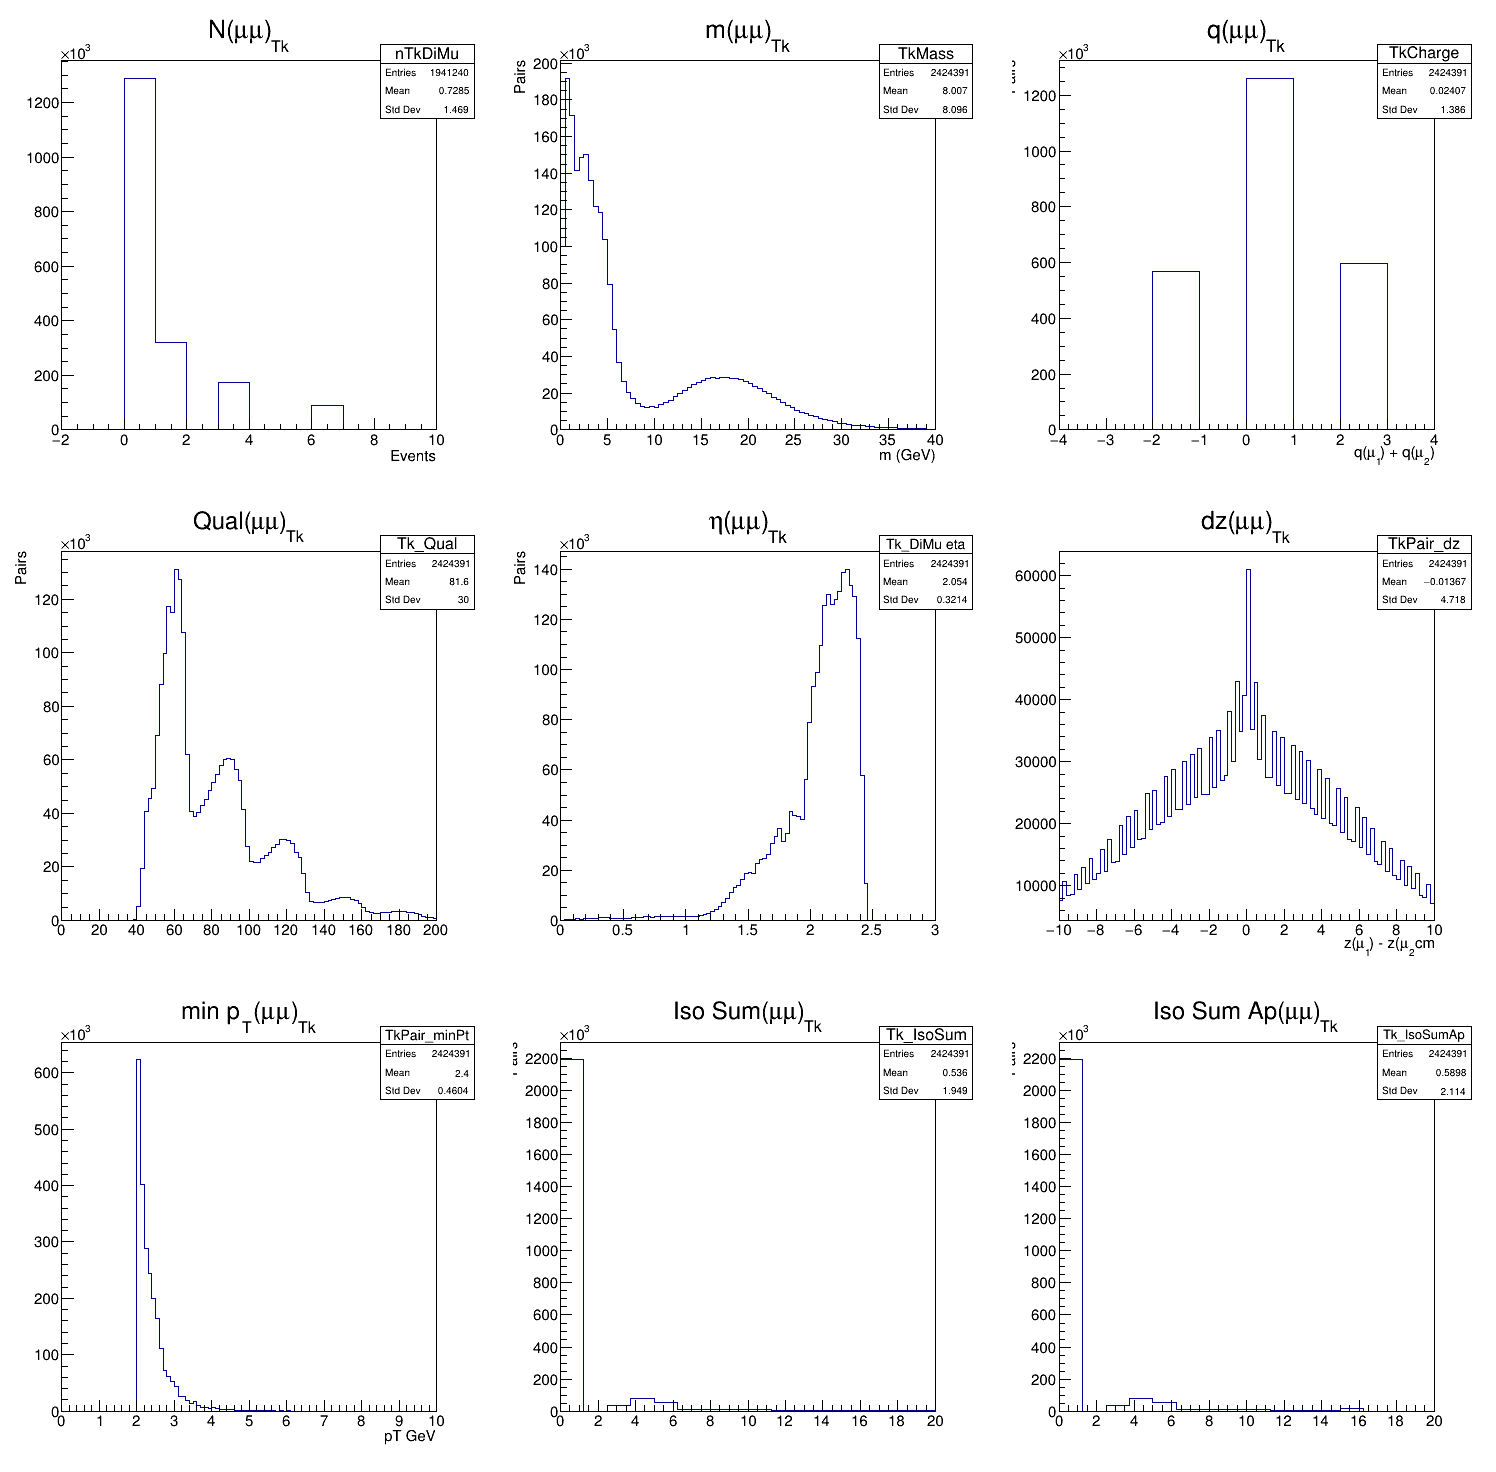

In [13]:
rdf_Tkdimu_one = makeDimuonPairs("Tk",rdf)
rdf_Tkdimu = makeTk_DiMuonPairs(rdf_Tkdimu_one)

## Now we make a plot of the number of generated muons and the ones reconstructed by L1T
hNTkPairs = rdf_Tkdimu.Histo1D(("nTkDiMu","N(#mu#mu)_{Tk};Events",12,-2,10), "nTkDiMu")
hTkPairMass = rdf_Tkdimu.Histo1D(("TkMass","m(#mu#mu)_{Tk};m (GeV);Pairs",80,0,40), "TkDiMu_mass")
hTkPairCharge = rdf_Tkdimu.Histo1D(("TkCharge","q(#mu#mu)_{Tk};q(#mu_{1}) + q(#mu_{2});Pairs",8,-4,4), "TkDiMu_charge")
hTkPair_hwIsoSum = rdf_Tkdimu.Histo1D(("Tk_IsoSum","Iso Sum(#mu#mu)_{Tk};;Pairs",16,0,20),"TkDiMu_hwIsoSum")
hTkPair_hwIsoSumAp = rdf_Tkdimu.Histo1D(("Tk_IsoSumAp","Iso Sum Ap(#mu#mu)_{Tk};;Pairs",16,0,20),"TkDiMu_hwIsoSumAp")
hTkPair_hwQual = rdf_Tkdimu.Histo1D(("Tk_Qual","Qual(#mu#mu)_{Tk};;Pairs",100,0,200),"TkDiMu_hwQual")
hTkPair_eta = rdf_Tkdimu.Histo1D(("Tk_DiMu eta","#eta(#mu#mu)_{Tk};;Pairs",100,0,3),"TkDiMu_eta")
hTkPair_Dz = rdf_Tkdimu.Histo1D(("TkPair_dz","dz(#mu#mu)_{Tk};z(#mu_{1}) - z(#mu_{2}cm",100,-10,10),"TkDiMu_dz")
hTkPair_minPt = rdf_Tkdimu.Histo1D(("TkPair_minPt","min p_{T}(#mu#mu)_{Tk};pT GeV",100,0,10),"TkMu_minPT")
#hTkPair_hwIsoSum = createRatio(hTkPair_hwIsoSum.GetPtr(),hTkPair_minPt.GetPtr())
#hTkPair_hwIsoSumAp = createRatio(hTkPair_hwIsoSumAp.GetPtr(),hTkPair_minPt.GetPtr())

# hTkPair_hwIsoSum.Scale(0.03125)
# hTkPair_hwIsoSumAp.Scale(0.03125)



entries_TkDiMu_full = rdf_Tkdimu.Count().GetValue()
print(f"Processed {entries_TkDiMu_full} entries.")

c1 = ROOT.TCanvas("c1","c1", 1500, 1500)
c1.Divide(3,3)
for i, h in enumerate([hNTkPairs, hTkPairMass, hTkPairCharge, hTkPair_hwQual, hTkPair_eta, hTkPair_Dz,hTkPair_minPt ,hTkPair_hwIsoSum, hTkPair_hwIsoSumAp]):
    c1.cd(i+1)
    h.Draw()

c1.Draw()

In [14]:

# ## And plot it
# c2 = ROOT.TCanvas("c2","c2", 1200, 800)
# c2.Divide(2,2)
# for i, h in enumerate([hTkPair_Dz, hTkPair_minPt]):
#     c2.cd(i+1)
#     h.Draw()
# c2.Draw()

In [ ]:
def select_ind(name, rdf):
    
    #Let us impose a selection criteria here
    #rdf = rdf.Define(f"{name}DiMu_selind",f"{name}DiMu_indices")
    rdf = rdf.Define(f"{name}DiMu_good", f"({name}DiMu_charge<0.1 && {name}DiMu_charge>-0.1) &&({name}DiMu_dz<1 && ({name}DiMu_dz>-1))&&({name}Mu_minPT>0) && (TkDiMu_hwQual>75) && (TkDiMu_eta<=2) &&(TkDiMu_hwIsoSum<=1.5)&& (TkDiMu_hwIsoSumAp<=1.5)")                    
    rdf = rdf.Define(f"Good{name}DiMu_indices", f"{name}DiMu_indices[{name}DiMu_good]")
    rdf = rdf.Filter(f"Sum({name}DiMu_good)  >= 1")
    rdf = rdf.Define(f"n{name}DiMu_sel",f"Good{name}DiMu_indices.size()")
    rdf = rdf.Define(f"{name}DiMu_selMass",f"{name}DiMu_mass[{name}DiMu_good]")
    rdf = rdf.Define(f"{name}DiMu_selCharge",f"{name}DiMu_charge[{name}DiMu_good]")
    rdf = rdf.Define(f"{name}DiMu_seldz",f"{name}DiMu_dz[{name}DiMu_good]")
    rdf = rdf.Define(f"{name}DiMu_selMinPt",f"{name}Mu_minPT[{name}DiMu_good]")
    rdf = rdf.Define(f"GoodTkDiMu_hwQual",f"TkDiMu_hwQual[{name}DiMu_good]")
    rdf = rdf.Define(f"GoodTkDiMu_hwIsoSum",f"TkDiMu_hwIsoSum[{name}DiMu_good]")
    rdf = rdf.Define(f"GoodTkDiMu_hwIsoSumAp",f"TkDiMu_hwIsoSumAp[{name}DiMu_good]")
    rdf = rdf.Define(f"TkDiMu_selEta",f"TkDiMu_eta[{name}DiMu_good]")
    
    return rdf;
rdf_selFeat = select_ind("Tk",rdf_Tkdimu)

Processed 32143 entries.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


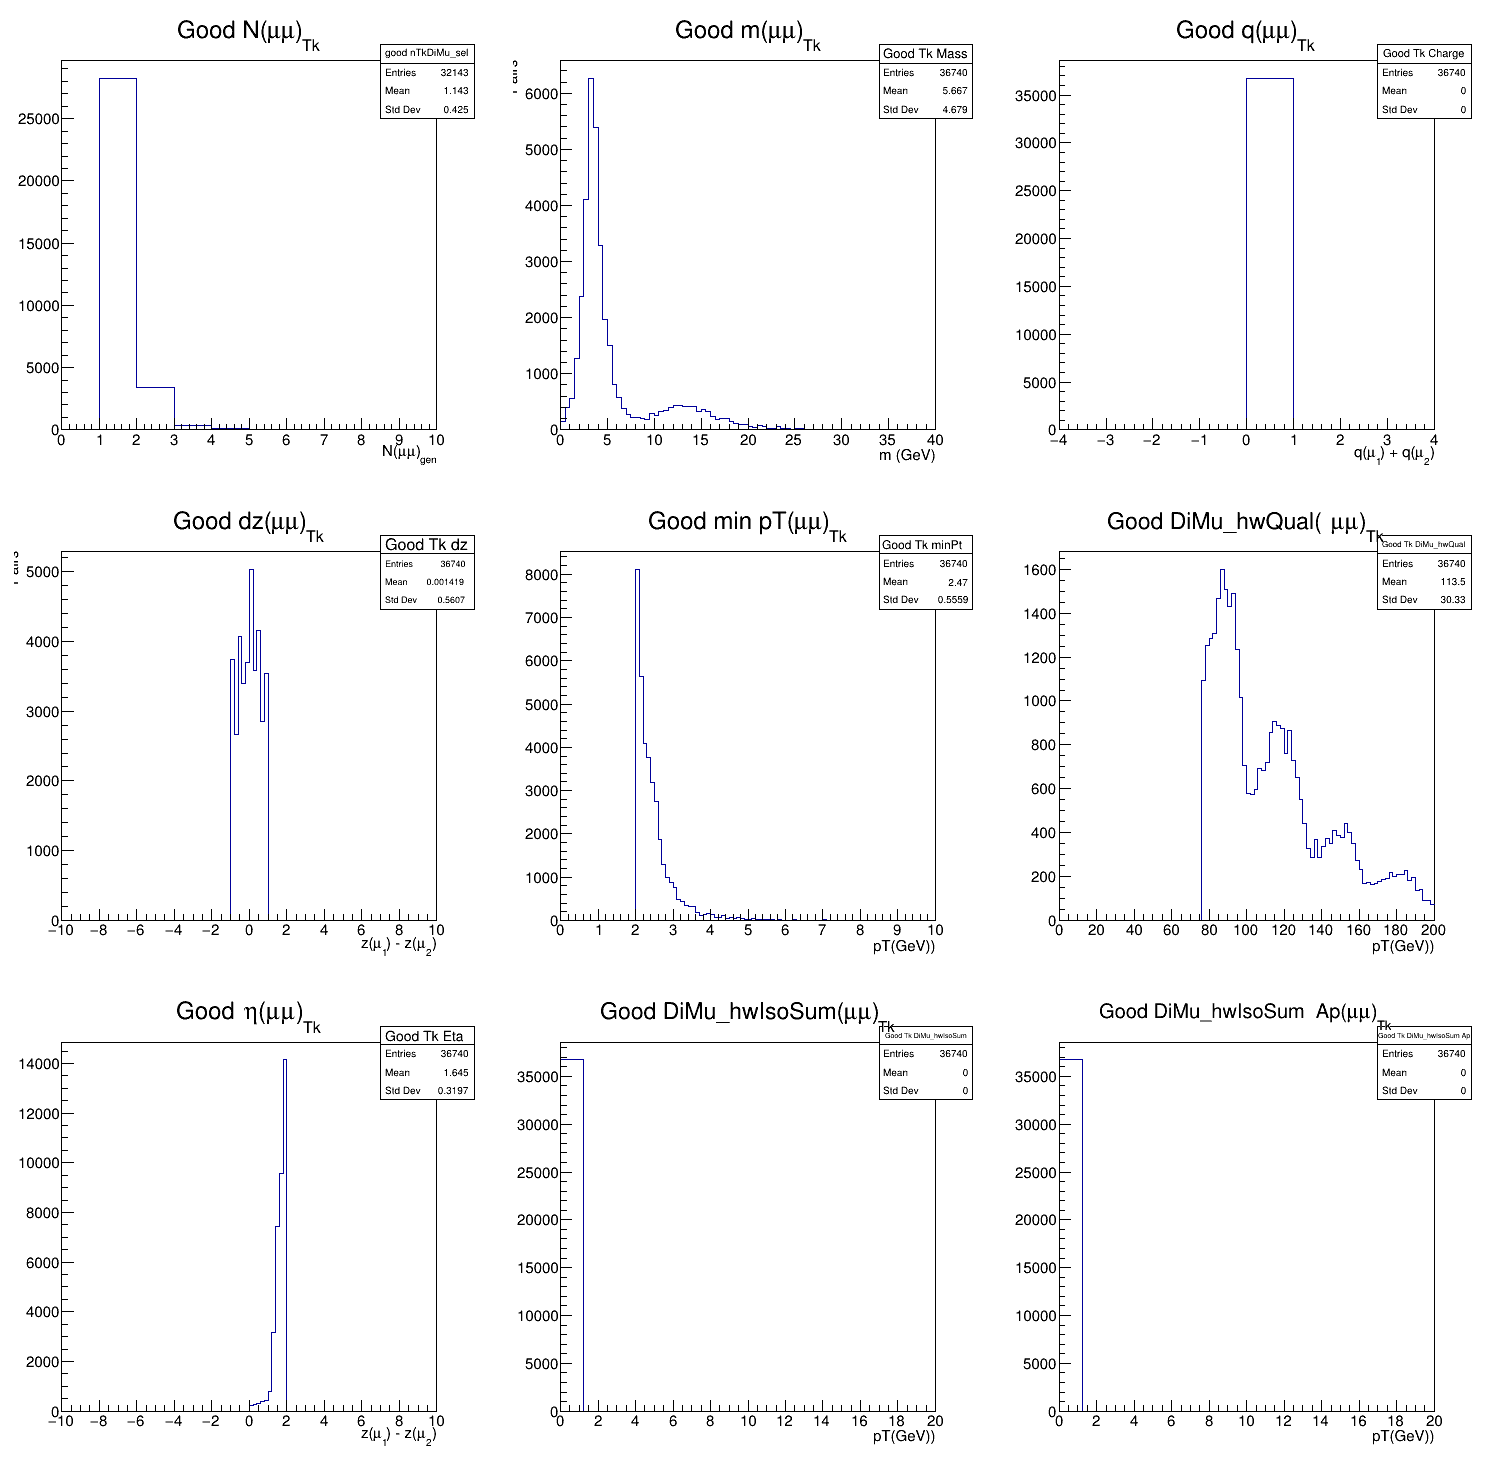

In [29]:
#rdf_selFeat = rdf_TkDisel
hNGoodTkPairs = rdf_selFeat.Histo1D(("good nTkDiMu_sel","Good N(#mu#mu)_{Tk};N(#mu#mu)_{gen};Events",10,0,10), "nTkDiMu_sel")
hGoodTkPairMass = rdf_selFeat.Histo1D(("Good Tk Mass","Good m(#mu#mu)_{Tk};m (GeV);Pairs",80,0,40), "TkDiMu_selMass")
hGoodTkPairCharge = rdf_selFeat.Histo1D(("Good Tk Charge","Good q(#mu#mu)_{Tk};q(#mu_{1}) + q(#mu_{2});Pairs",8,-4,4), "TkDiMu_selCharge")
hGoodTkPairDz = rdf_selFeat.Histo1D(("Good Tk dz","Good dz(#mu#mu)_{Tk};z(#mu_{1}) - z(#mu_{2});Pairs",100,-10,10), "TkDiMu_seldz")
hGoodTkPairMinPT = rdf_selFeat.Histo1D(("Good Tk minPt","Good min pT(#mu#mu)_{Tk};pT(GeV))",100,0,10), "TkDiMu_selMinPt")
hGoodTkDiMu_hwQual = rdf_selFeat.Histo1D(("Good Tk DiMu_hwQual","Good DiMu_hwQual(#mu#mu)_{Tk};pT(GeV))",100,0,200), "GoodTkDiMu_hwQual")
hGoodTkDiMu_hwIsoSum = rdf_selFeat.Histo1D(("Good Tk DiMu_hwIsoSum","Good DiMu_hwIsoSum(#mu#mu)_{Tk};pT(GeV))",16,0,20), "GoodTkDiMu_hwIsoSum")
hGoodTkDiMu_hwIsoSumAp = rdf_selFeat.Histo1D(("Good Tk DiMu_hwIsoSum Ap","Good DiMu_hwIsoSum  Ap(#mu#mu)_{Tk};pT(GeV))",16,0,20), "GoodTkDiMu_hwIsoSumAp")
hGoodTkPairEta = rdf_selFeat.Histo1D(("Good Tk Eta","Good #eta(#mu#mu)_{Tk};z(#mu_{1}) - z(#mu_{2});Pairs",100,-10,10), "TkDiMu_selEta")



#rdf_selFeat.Describe()
entries_genDi_sel1 = rdf_selFeat.Count().GetValue()
print(f"Processed {entries_genDi_sel1} entries.")

c1 = ROOT.TCanvas("c1","c1", 1500, 1500)
c1.Divide(3,3)
for i, h in enumerate([hNGoodTkPairs, hGoodTkPairMass, hGoodTkPairCharge, hGoodTkPairDz, hGoodTkPairMinPT,hGoodTkDiMu_hwQual,hGoodTkPairEta,hGoodTkDiMu_hwIsoSum,hGoodTkDiMu_hwIsoSumAp ]):
    c1.cd(i+1)
    h.Draw()
c1.Draw()

In [17]:
h1 = hGoodTkPairMass.GetPtr()
h1.SetLineColor(kBlue+1)
h1.SetLineWidth(2)
h1.SetMaximum(140000)
h2 = hTkPairMass.GetPtr()
h2.SetLineColor(kRed)
h2.SetLineWidth(2)
h2.SetMaximum(130000)


In [18]:
def createCanvasPads():
    c = ROOT.TCanvas("c", "canvas", 800, 800)
    # Upper histogram plot is pad1
    pad1 =ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
    pad1.SetBottomMargin(0)  # joins upper and lower plot
    pad1.SetGridx()
    pad1.Draw()
    # Lower ratio plot is pad2
    c.cd()  # returns to main canvas before defining pad2
    pad2 =ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
    pad2.SetTopMargin(0)  # joins upper and lower plot
    pad2.SetBottomMargin(0.2)
    pad2.SetGridx()
    
    pad2.Draw()
 
    return c, pad1, pad2;

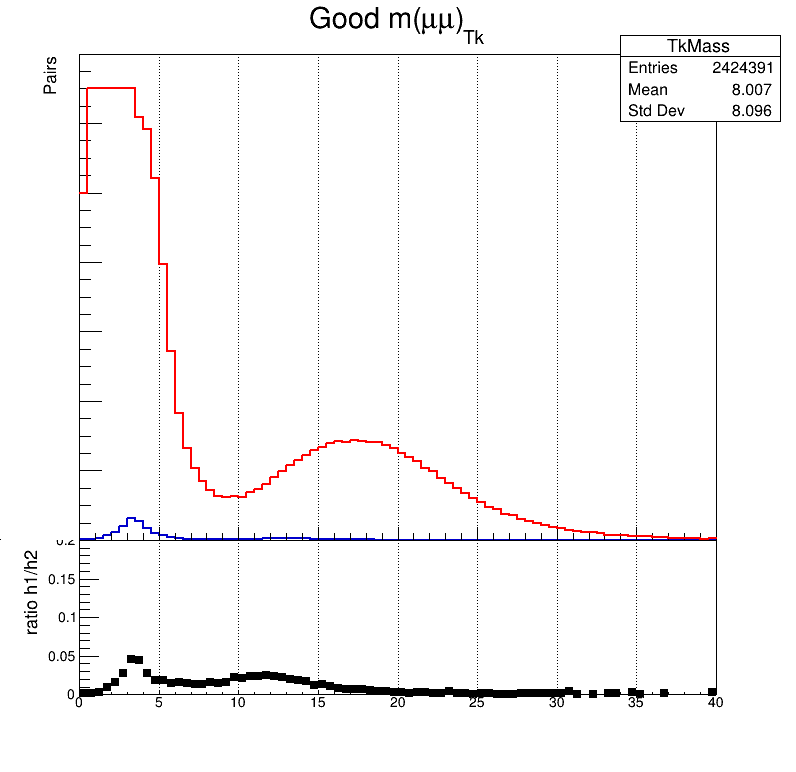

In [19]:
h3 = createRatio(h1, h2)
c, pad1, pad2 = createCanvasPads()
pad1.cd()
h1.Draw()
h2.Draw("same")
# to avoid clipping the bottom zero, redraw a small axis
h1.GetYaxis().SetLabelSize(0.0)
axis =ROOT.TGaxis(-5, 20, -5, 220, 20, 220, 510, "")
axis.SetLabelFont(43)
axis.SetLabelSize(15)
axis.Draw()
pad2.cd()
h3.Draw("ep")
c.Draw()

In [20]:
def dY_Number(h, Freq, T, entries):
    h_final = h.Clone()
    h_final.Scale((Freq*T)/entries)
    return h_final;

total Entries 1941240


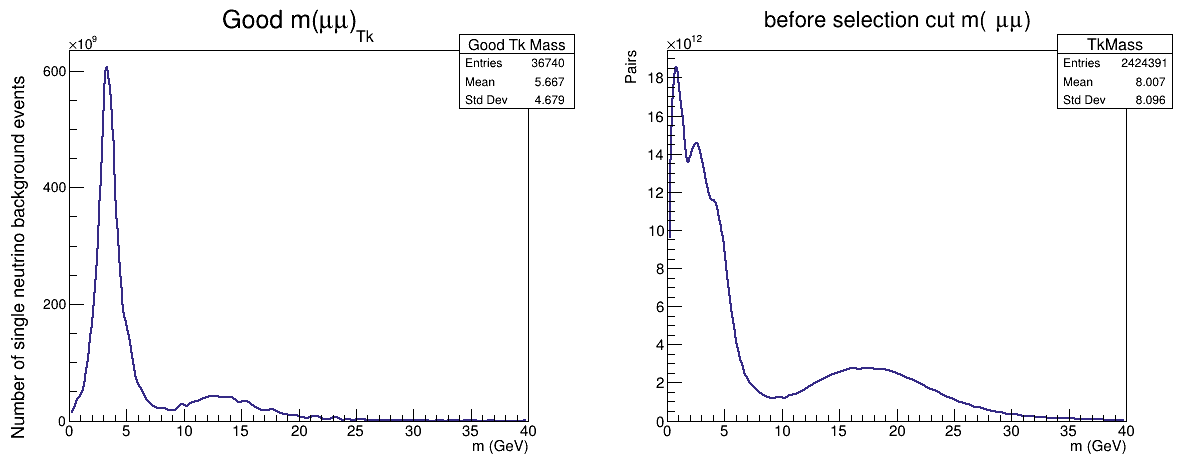

In [22]:
h5 = dY_Number(h1, 35*(10**6), 53.5*(10**5), entries_TkDiMu_full )
h6 = dY_Number(h2, 35*(10**6), 53.5*(10**5), entries_TkDiMu_full )
h6.SetTitle("before selection cut m(#mu#mu)")
y=h5.GetYaxis()
y.SetTitle("Number of single neutrino background events ")
y.SetNdivisions(505)
y.SetTitleSize(20)
y.SetTitleFont(43)
y.SetTitleOffset(1.55)
y.SetLabelFont(43)
y.SetLabelSize(15)
c = ROOT.TCanvas("","",1200,500)
c.Divide(2,1)
c.cd(1)
h5.Draw("hist c plc")
c.cd(2)
h6.Draw("hist c plc")
c.Draw()
print(f"total Entries {entries_TkDiMu_full}")

In [23]:
i=h5.GetXaxis().FindBin(25)

51

In [25]:
h5.GetBinContent(i)

519335064185.77814

In [26]:
h5.GetXaxis().GetBinWidth(i)

0.5

In [28]:
N_b=(h5.GetBinContent(i)/h5.GetXaxis().GetBinWidth(i))
print(N_b)

1038670128371.5563
